# Herkenning van handgeschreven cijfers met Machine Learning

## k-Nearest Neigbours

- Minor AAI Hogeschool van Amsterdam
- Docenten: Michiel Bontenbal & Maarten Post
- Vrijdag 16 februari 2024
- Acknowledgments: Stijn Oomes

### To do:
- Run het notebook
- Upload het notebook naar je Gitlab, maak aantekening in je logboek, werk bloom-tabel bij.

## Importeer libraries

In [2]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from keras import datasets

## Verover de data

In [3]:
#load the dataset from keras and create train and test sets
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = datasets.mnist.load_data()

In [4]:
X_train_images.shape

(60000, 28, 28)

In [5]:
y_train_labels.shape

(60000,)

## Controleer de data

Controleer als eerste het aantal klassen

In [6]:
#check number of unique classes
np.unique(y_train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Andere checks:

In [7]:
#test shape of test set
X_test_images.shape

(10000, 28, 28)

In [8]:
y_test_labels.shape

(10000,)

In [9]:
print(y_train_labels[:10])

[5 0 4 1 9 2 1 3 1 4]


### Toon 12 random cijfers uit de training-set

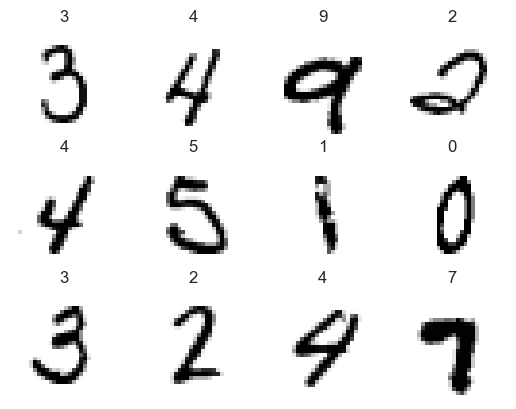

In [10]:
for sub in range(1, 13):
        plt.subplot(3,4, sub)
        i = np.random.randint(60000)

        plt.imshow(255 - X_train_images[i], cmap='gray')
        plt.title(y_train_labels[i]);
        plt.axis("off")

## Maak de images geschikt voor ML modellen

We gaan in deze stap de images 'flatten' met de reshape method om ze later te kunnen bewerken.

In [11]:
X_train_images_flatten = X_train_images.reshape((60000,28*28))
X_train_images_flatten.shape

(60000, 784)

In [12]:
X_test_images_flatten = X_test_images.reshape((10000,28*28))
X_test_images_flatten.shape

(10000, 784)

## k-Nearest Neighbours


Het is beter om in eerste instantie slechts een **deel** van de training set en de test set te gebruiken, bijvoorbeeld 10%.

Het trainen duurt niet lang, maar het voorspellen kan zeer rekenintensief zijn.

Gebruik %%timeit om deze bewering te controleren.

In [13]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

Train de kNN met fit(). We kiezen eerst 10% van de train set (=6000) en test set. Je mag dat later verruimen.

In [14]:
#train het model met fit()
knn.fit(X_train_images_flatten[:6000,:], y_train_labels[:6000])

KNeighborsClassifier(weights='distance')

In [15]:
#print de accuracy van het model
y_predicted_labels = knn.predict(X_test_images_flatten[:1000,:])
print(accuracy_score(y_test_labels[:1000], y_predicted_labels[:1000]))

0.919


☝️ Noteer je resultaat.

- KNN: 91.9%

Bepaal een verwarringsmatrix en plot deze matrix als heatmap.

In [16]:
#maak een confusion matrix
cm = confusion_matrix(y_test_labels[:1000], y_predicted_labels[:1000])

print(cm)

[[ 83   0   0   0   0   0   2   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  2   4  98   0   1   0   2   7   2   0]
 [  0   1   0  98   0   2   2   2   0   2]
 [  0   2   0   0  98   0   1   1   0   8]
 [  1   1   0   0   1  81   0   0   2   1]
 [  2   0   0   0   1   0  84   0   0   0]
 [  0   6   0   0   1   1   0  89   0   2]
 [  2   1   0   4   1   1   2   0  74   4]
 [  0   0   0   0   2   0   0   2   2  88]]


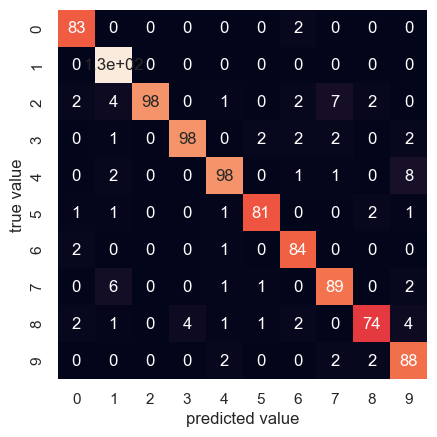

In [17]:
# print the confusion matrix
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

Wat valt je op?   

Je ziet dat het model de meeste fouten maakt met de getallen 1 en 7, 3 en 8, 4 en 9. Dit komt omdat deze getallen ongeveer dezelfde structuur hebben. Bijvoorbeeld 1 en 7, hebben allebij een lange rechte lijn. 3 en 8 hebben allebei een 2 loops etc.

## Toon 12 voorbeelden van fouten van het model

Ik bepaal eerst welke cijfers fout zijn gecategoriseerd.

In [18]:
mistakes =  y_test_labels[:1000]!=y_predicted_labels[:1000]

Ik bekijk een aantal voorbeelden.

In [19]:
mistakes[:100]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False])

En bepaal hoeveel fouten er zijn:

In [20]:
np.count_nonzero(mistakes)

81

Ik wil hier alleen de fout gecategoriseerde cijfers plotten.

Op dit moment worden in de code hieronder 12 willekeurige cijfers uit de *hele* test set gekozen.

**OPDRACHT**: schrijf de code om naar alleen **fout** geclassificeerde cijfers.

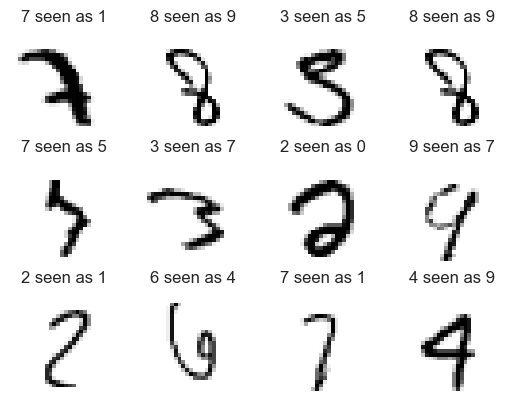

In [27]:
# Mistake indices
mistake_indices = np.where(mistakes)[0]

# Plotting the mistakes
for sub in range(1,13):
        plt.subplot(3,4, sub)
        i = mistake_indices[np.random.randint(len(mistake_indices))]
        plt.axis("off")
        plt.imshow(255 - X_test_images[i,:,:], cmap='gray')
        predicted_number = y_predicted_labels[i]
        actual_number = y_test_labels[i]
        plt.title('{0} seen as {1}'.format(actual_number, predicted_number))

Hier gebruiken we `np.where(mistakes)[0]` om de indeces te krijgen van de images die fout voorspelt waren. Daarna, in de loop, selecteren we een random index van de `mistake_indices` en plotten we deze.

### TO DO: Upload het notebook naar je Gitlab, maak aantekening in je logboek, werk bloom-tabel bij.